In [27]:
import pickle
import pandas as pd
from pathlib import Path
import bz2
import numpy as np

In [9]:
with bz2.open("../doc_lbe.pkl.bz2", "rb") as f:
    doc_lbe_df = pickle.load(f)

In [10]:
with bz2.open("../card_lbe.pkl.bz2", "rb") as f:
    card_lbe_df = pickle.load(f)

In [62]:
id_card_to_id_card_int = card_lbe_df.set_index("id_card")["id_card_int"].to_dict()
id_doc_to_id_doc_int = doc_lbe_df.set_index("id_doc")["id_doc_int"].to_dict()

#### Work with september

In [2]:
path = '../09_prepared.pkl.bz2'

In [53]:
with bz2.open(path, 'rb') as f:
    df = pickle.load(f)

In [63]:
df["id_card_int"] = df["id_card"].map(id_card_to_id_card_int)
df["id_doc_int"] = df["id_doc"].map(id_doc_to_id_doc_int)

In [64]:
df.head(2)

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-09-01 17:01:25,0E05D308-5CEC-EA11-B444-005056A7539A,0,8594499,52,271,1.0,108.0,False,1538855,1283228
1,2020-09-01 17:35:36,610205A1-61EC-EA11-B444-005056A7539A,0,1452388,52,271,1.0,108.0,False,267307,8873113


- date - Date of shoping processing
- id_doc - Receipt ID
- id_card - Customer id
- id_order - If 0, than offline, otherwise online
- id_tov - Price look-up codes, PLU
- id_kontr - Distributor id
- quantity - Amount of bought items
- is_green - Discount
- sum - Sum of bought items

## Overview

In [56]:
df.shape

(42100858, 11)

In [66]:
df.sample(5)

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
15660604,2020-09-12 11:40:30,4945929E-D4F4-EA11-B444-005056A7539A,0,5016382,21629,15252,1.000,98.00,False,928216,6700866
10442353,2020-09-08 09:54:56,EB2FA560-A0F1-EA11-B444-005056A7539A,0,6794255,185,13983,1.000,129.00,False,1259379,21513507
24138067,2020-09-18 10:56:00,7ED9BC8E-84F9-EA11-B444-005056A7539A,6170840,3531118,36159,-9999,1.000,138.00,False,617357,11606608
27670174,2020-09-21 10:10:38,837AB235-DAFB-EA11-B444-005056A7539A,6281351,1370263,16122,12134,1.000,110.38,False,252795,12030148
28120227,2020-09-21 19:45:07,CDBF61E8-2AFC-EA11-B444-005056A7539A,0,7899611,22680,17394,0.704,151.36,False,1447443,18821471


In [70]:
df[["sum", "quantity"]].describe()

,sum,quantity
count,4.210086e+07,4.210086e+07
mean,1.149112e+02,1.427065e+00
std,1.072201e+02,3.101411e+01
min,-1.022110e+03,-2.755000e+00
25%,4.800000e+01,1.000000e+00
50%,8.900000e+01,1.000000e+00
75%,1.501100e+02,1.000000e+00
max,3.840000e+04,5.000000e+03


In [71]:
df['id_card_int'].nunique()

1358089

In [97]:
df['id_card_int'].value_counts()

883386     189812
568930        753
1243870       707
518424        694
213588        675
            ...  
981865          1
1010507         1
1560491         1
881086          1
1371313         1
Name: id_card_int, Length: 1358089, dtype: int64

In [141]:
# Customers with biggest number of receipts
df_agg = df.groupby("id_card_int")["id_doc_int"].agg("nunique")
df_agg.nlargest(20)

id_card_int
883386     96719
914348       163
620767       161
317600       140
1157493      134
1387578      130
1407478      129
1431790      123
1422663      121
137816       119
344206       119
1523082      119
7922         118
542660       117
1434952      116
421742       114
202327       113
1445040      112
74755        111
1152370      111
Name: id_doc_int, dtype: int64

<AxesSubplot:>

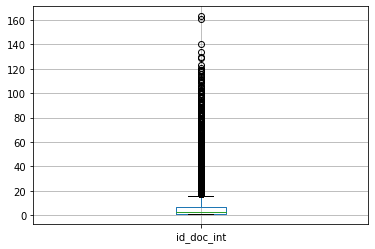

In [142]:
pd.DataFrame(df_agg[df_agg < 1000]).boxplot()

In [143]:
# Mean number of receipts per customer
df_agg.mean(), df_agg.std()

(5.676902618311465, 83.27751947284516)

In [144]:
suspects = df_agg[df_agg > 150].index.tolist()

In [145]:
# Customers with biggest number of goods
df_agg = df.groupby("id_card_int")["id_tov"].agg("nunique")
df_agg.nlargest(20)

id_card_int
883386     2851
568930      418
13789       315
1176405     313
761714      311
1658676     310
121856      305
288752      302
96493       300
937039      299
518424      296
817278      296
542043      295
230546      294
1447941     293
1497410     293
1120884     290
213748      287
1711723     287
425024      286
Name: id_tov, dtype: int64

In [147]:
# Customers with biggest expences
df_agg = df.groupby("id_card_int")["sum"].agg("sum")
df_agg.nlargest(20)

id_card_int
883386     18259091.85
568930       211154.31
1243870      124131.91
1755035      116411.20
1447941       98215.49
935791        92720.81
497966        91556.46
57748         87851.95
1372          86059.14
129282        85682.71
1524177       84910.85
1062580       81783.34
121856        81464.70
1499243       81153.36
1268011       80136.85
116966        79485.16
478842        79201.86
163661        78958.13
238391        78868.38
761714        78270.96
Name: sum, dtype: float64

<AxesSubplot:>

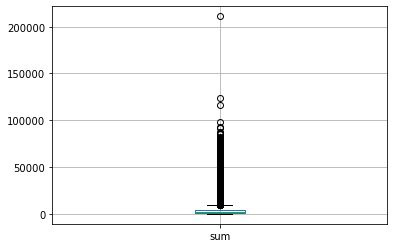

In [148]:
pd.DataFrame(df_agg[df_agg < 300000]).boxplot()

In [150]:
suspects.extend(df_agg[df_agg > 100000].index.tolist())

### Analyze only online customers separately 

In [106]:
online_customers = df[df.id_order != 0]['id_card_int'].unique()
offline_customers = df[df.id_order == 0]['id_card_int'].unique()
only_onl_cust = set(online_customers) - set(offline_customers)
len(only_onl_cust)

53809

In [107]:
df_onl = df[df.id_card_int.isin(only_onl_cust)]
df_onl.shape

(1728895, 11)

In [108]:
sum_per_order = df_onl.groupby(["id_order"])["sum"].sum()
sum_per_order.describe()

count    162218.000000
mean       1394.548977
std        1216.897890
min           0.000000
25%         578.540000
50%        1051.505000
75%        1826.177500
max       22825.480000
Name: sum, dtype: float64

<AxesSubplot:>

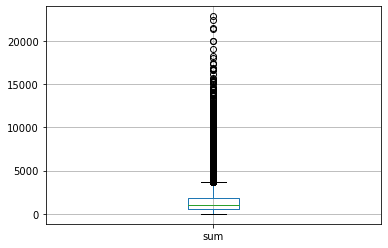

In [109]:
pd.DataFrame(sum_per_order).boxplot()

In [133]:
# Customers with smallest number of orders
df_agg = df_onl.groupby("id_card_int")["id_order"].agg("nunique")
df_onl_single_order = df_agg[df_agg < 2]

In [136]:
onl_single_order = df_onl[df_onl.id_card_int.isin(df_onl_single_order.index)].groupby("id_card_int")["sum"].agg("sum")

<AxesSubplot:>

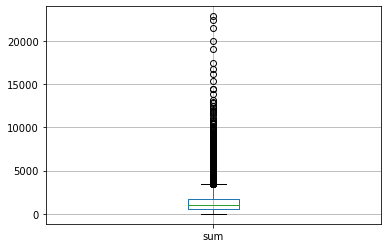

In [137]:
pd.DataFrame(onl_single_order).boxplot()

In [152]:
# Single order but quiet expensive.. Suspicious

suspects.extend(onl_single_order[onl_single_order > 18000].index.tolist())

In [160]:
# Customers with smallest number of goods
df_agg = df_onl.groupby("id_card_int")["id_tov"].agg("nunique")
df_onl_single_tov = df_agg[df_agg < 2]

In [163]:
onl_single_tov = df_onl[df_onl.id_card_int.isin(df_onl_single_tov.index)].groupby("id_card_int")["sum"].agg("sum")

<AxesSubplot:>

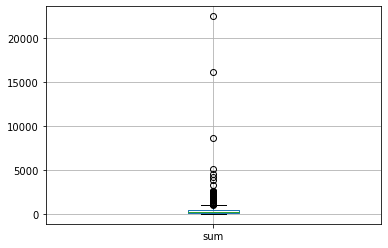

In [164]:
pd.DataFrame(onl_single_tov).boxplot()

In [165]:
# Single good but quiet expensive.. Suspicious

suspects.extend(onl_single_tov[onl_single_tov > 6000].index.tolist())

## Final results

In [167]:
len(suspects)

15

In [168]:
suspects

[620767,
 883386,
 914348,
 568930,
 883386,
 1243870,
 1755035,
 897626,
 1121726,
 1429536,
 1911522,
 1929067,
 663977,
 897626,
 938137]

In [170]:
res = pd.DataFrame(suspects, columns=['id_card_int'])
with open("fake_id_card_int.pkl", 'wb') as f:
    pickle.dump(res, f)